# Task 3 - House Price Prediction

Use a dataset that includes information about housing prices and features like square footage, number of bedrooms, etc. to train a model that can predict the price of a new house

Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import zscore

In [2]:
os.chdir("C:\\Users\\AFIFA\\Downloads\\House1\\")
os.getcwd()

'C:\\Users\\AFIFA\\Downloads\\House1'

Load the dataset

In [3]:
housing_data = pd.read_csv('kc_house_data.csv')

Drop the 'id' column

In [4]:
housing_data.drop('id', axis=1, inplace=True)

Convert 'date' column to datetime and extract year and month

In [5]:
housing_data['date'] = pd.to_datetime(housing_data['date'])
housing_data['year'] = housing_data['date'].dt.year
housing_data['month'] = housing_data['date'].dt.month

Drop the 'date' column

In [6]:
housing_data.drop('date', axis=1, inplace=True)

Handle missing values

In [7]:
imputer = SimpleImputer(strategy='median')
housing_data = pd.DataFrame(imputer.fit_transform(housing_data), columns=housing_data.columns)

Handle outliers with z-score

In [8]:
z_scores = zscore(housing_data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
housing_data = housing_data[filtered_entries]

Feature engineering

In [9]:
housing_data['sqft_per_bedroom'] = housing_data['sqft_living'] / housing_data['bedrooms']

Split features (X) and target variable (y)

In [10]:
X = housing_data.drop('price', axis=1)
y = housing_data['price']

Split data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initialize and train the linear regression model

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predict on the testing set

In [13]:
y_pred = model.predict(X_test)

Evaluate the model

In [14]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [15]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Absolute Error: 94081.44025782673
Mean Squared Error: 17734702168.67512
Root Mean Squared Error: 133171.70183141434
R-squared Score: 0.671967625663876


Scatter plot of actual vs. predicted prices

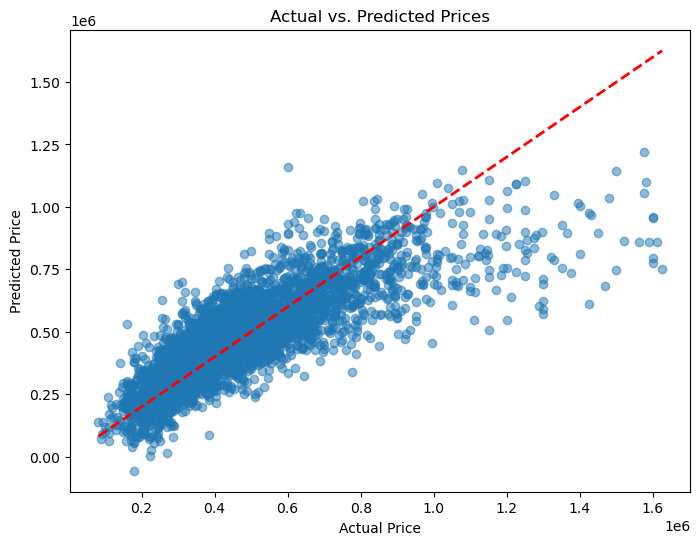

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.show()

Cross-validation for model evaluation

In [17]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", cv_rmse_scores.mean())

Cross-Validation RMSE Scores: [129088.59676728 138143.09312097 129922.9293342  125086.66336474
 126293.87364631]
Mean RMSE: 129707.03124670107


Visualize feature importance

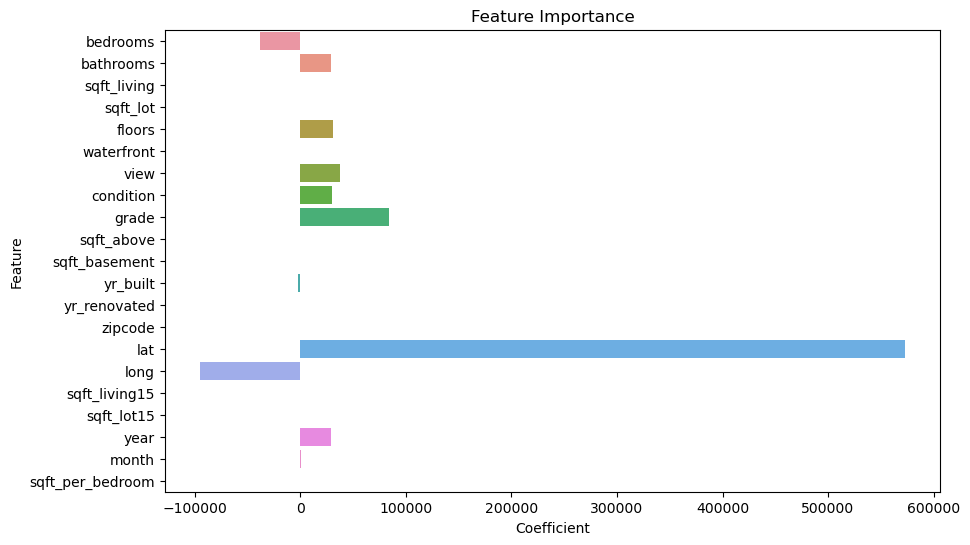

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model.coef_, y=X.columns)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Data Visualization

Box plots for categorical features

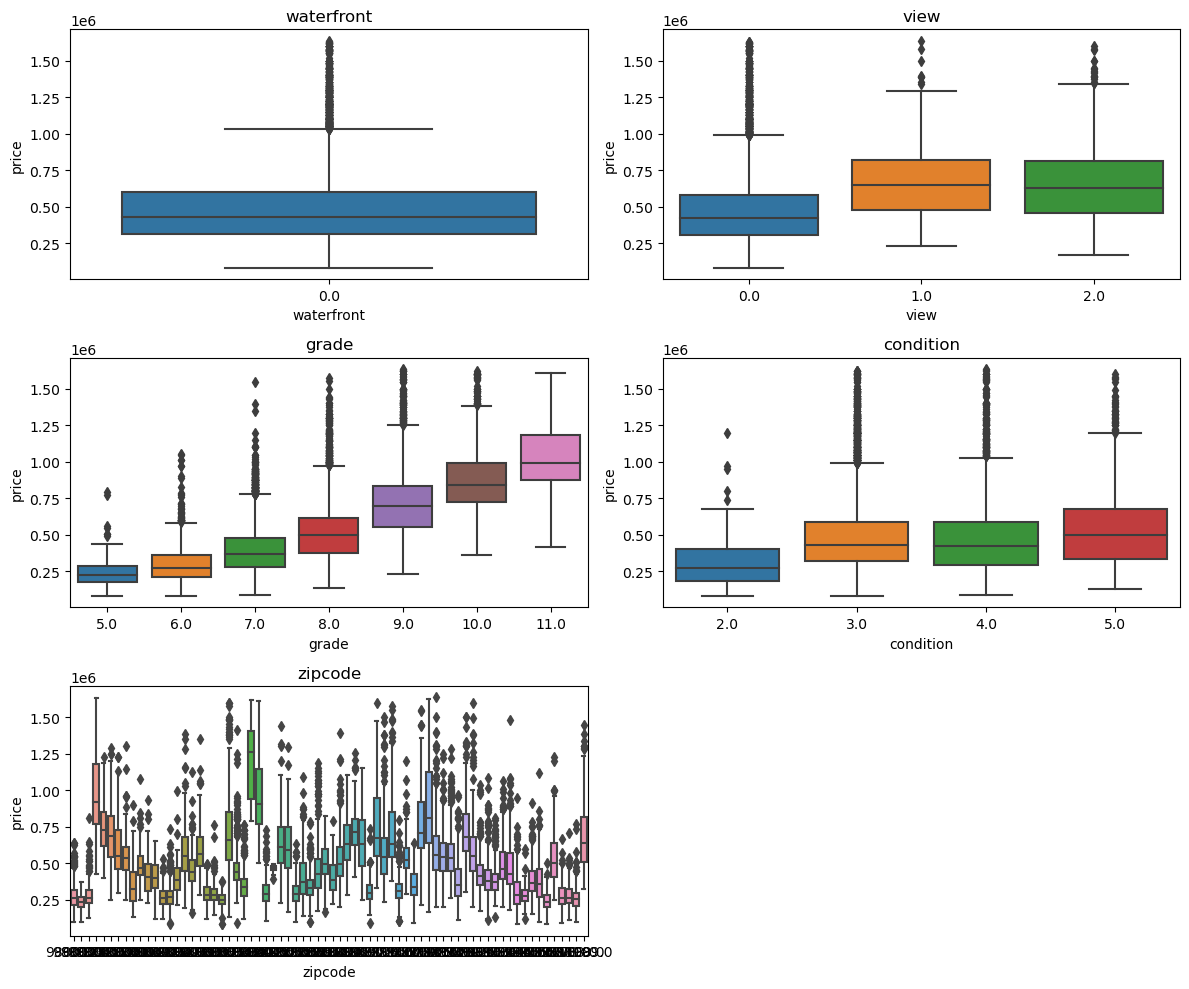

In [19]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(['waterfront', 'view', 'grade', 'condition', 'zipcode'], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=housing_data, x=col, y='price')
    plt.title(col)
plt.tight_layout()
plt.show()

Pair plot to visualize relationships between features

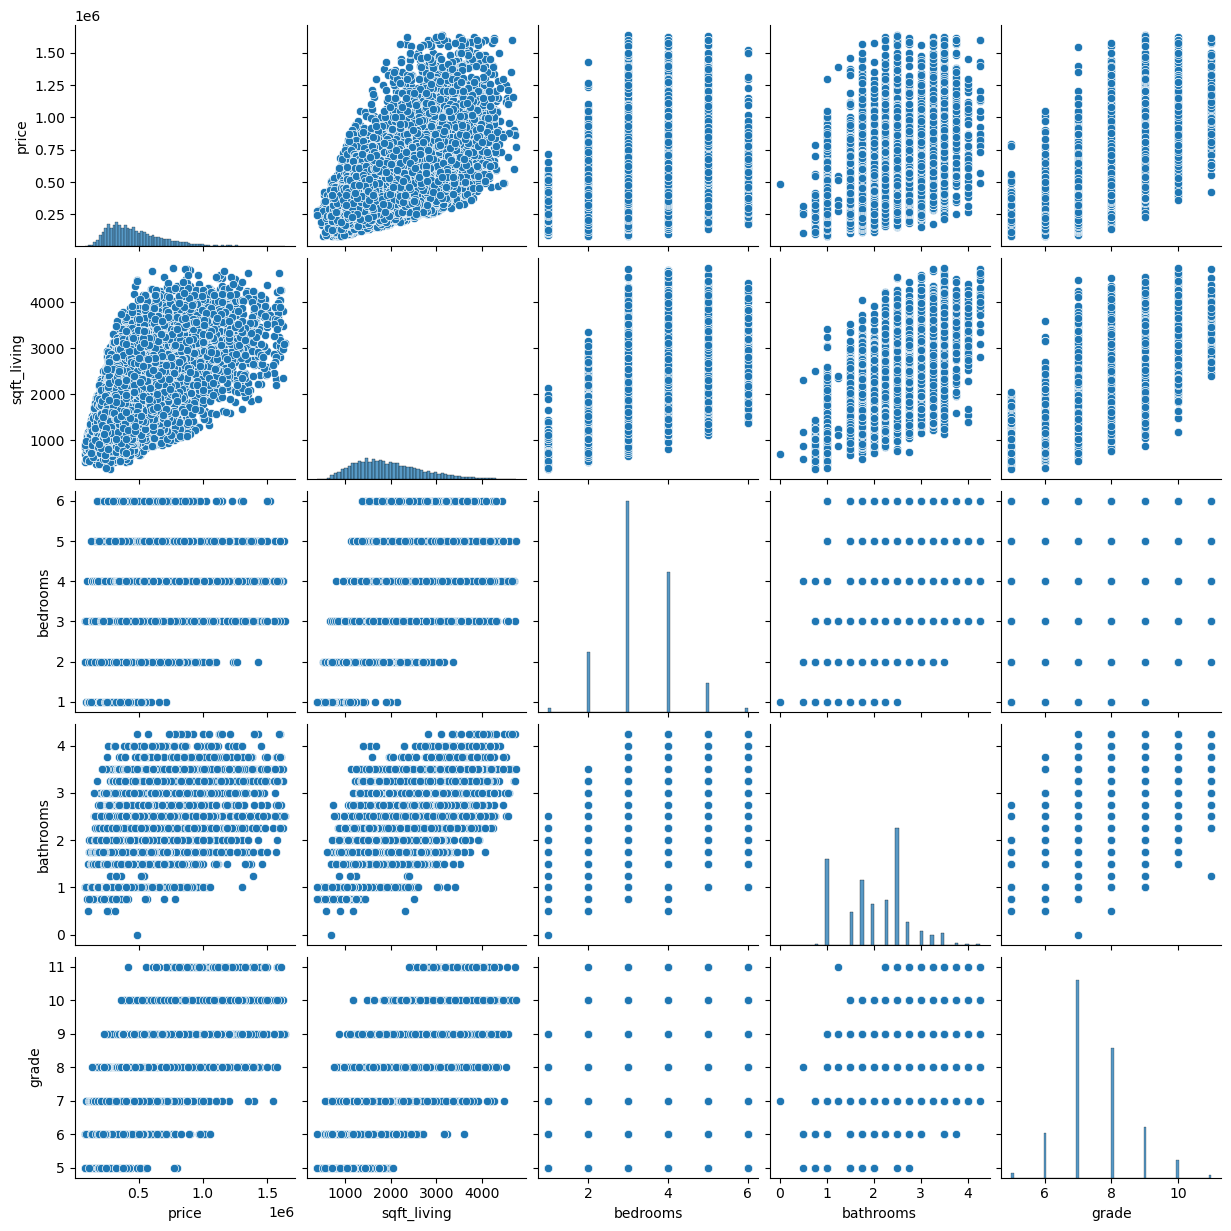

In [20]:
sns.pairplot(housing_data[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'grade']])
plt.show()

Correlation heatmap

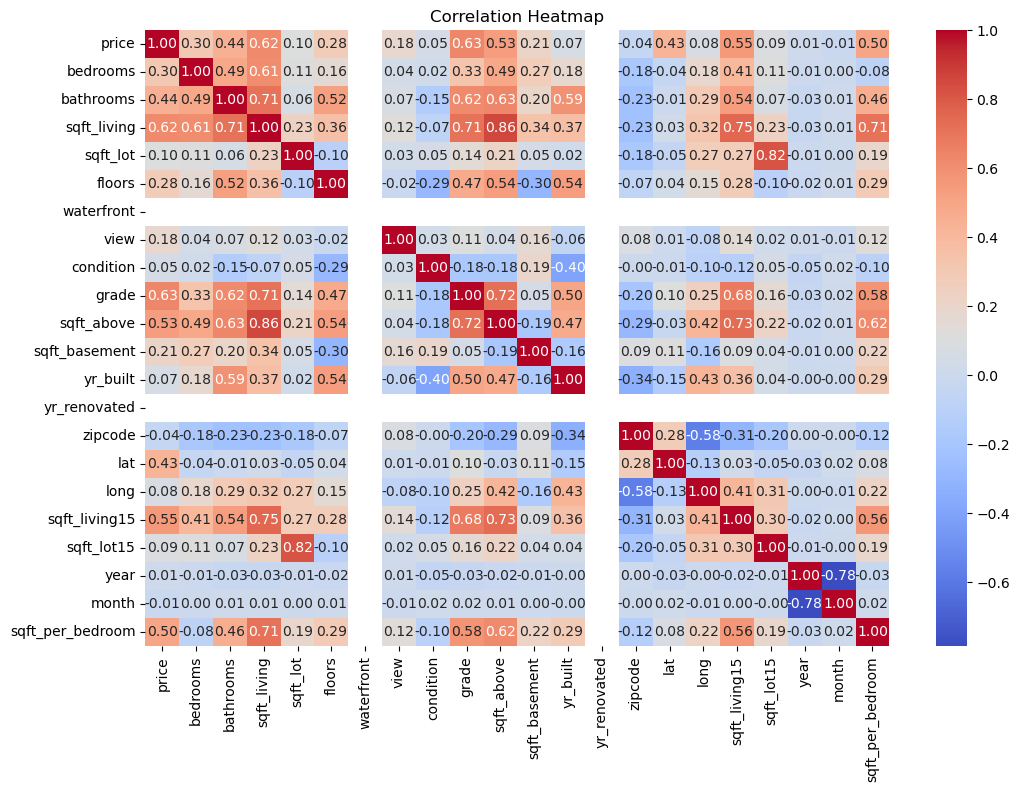

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(housing_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()